In [ ]:
import pandas as pd

file_name = r'C:\Users\Luca\Documents\Fatesg-IA-2\Big-Data\Raspagem de Dados\data\raw\dataset_crawler-google-places_2025-11-10_12-46-55-562.json'

try:
    df = pd.read_json(file_name)
    print(f"Sucesso! Dados carregados. Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print("Erro: O arquivo não foi encontrado. Verifique se o caminho absoluto está correto.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Sucesso! Dados carregados. Dimensões: 50 linhas e 11 colunas.


In [7]:
print("\n--- Estrutura do DataFrame ---")
print(f"Linhas (Registros): {df.shape[0]}")
print(f"Colunas (Atributos): {df.shape[1]}")

print("\n--- Primeiras 5 Linhas do Dataset (Head) ---")
print(df.head())

print("\n--- Informações Detalhadas (Dtypes e Nulos) ---")
df.info()



--- Estrutura do DataFrame ---
Linhas (Registros): 50
Colunas (Atributos): 11

--- Primeiras 5 Linhas do Dataset (Head) ---
                                              title  totalScore  reviewsCount  \
0                          Restaurante Mistura Fina         4.4           227   
1                                 Restaurante Árabe         4.6          2187   
2  Restaurante Gratidão - Restaurante comida por Kg         4.9           788   
3                                Galpão Restaurante         4.7           498   
4                          Restaurante Sabor D Casa         4.6           883   

                                street     city  state countryCode  \
0                               R. 239  Goiânia  Goiás          BR   
1                      Avenida 83, 205  Goiânia  Goiás          BR   
2  Av. Paranaíba, 715 - Qd. 90, Lt. 86  Goiânia  Goiás          BR   
3                  R. 83, s/n - Sala 2  Goiânia  Goiás          BR   
4                           R. 24, 418

In [8]:
print("\n--- Estatísticas Descritivas das Variáveis Numéricas ---")
print(df[['totalScore', 'reviewsCount']].describe().T)


--- Estatísticas Descritivas das Variáveis Numéricas ---
              count     mean          std  min    25%    50%    75%     max
totalScore     50.0    4.436     0.294688  3.4   4.30    4.4    4.6     5.0
reviewsCount   50.0  541.500  1228.879965  1.0  45.25  190.5  679.5  8316.0


In [9]:
print("\n--- Frequência de Cidades ---")
print(df['city'].value_counts())

print("\n--- Frequência das Categorias (Top 10) ---")
print(df['categoryName'].value_counts().head(10))


--- Frequência de Cidades ---
city
Goiânia    50
Name: count, dtype: int64

--- Frequência das Categorias (Top 10) ---
categoryName
Restaurante                 28
Restaurante self-service    11
Restaurante brasileiro       4
Lanchonete                   3
Empório gourmet              1
Restaurante italiano         1
Restaurante Mineiro          1
Restaurante fast-food        1
Name: count, dtype: int64


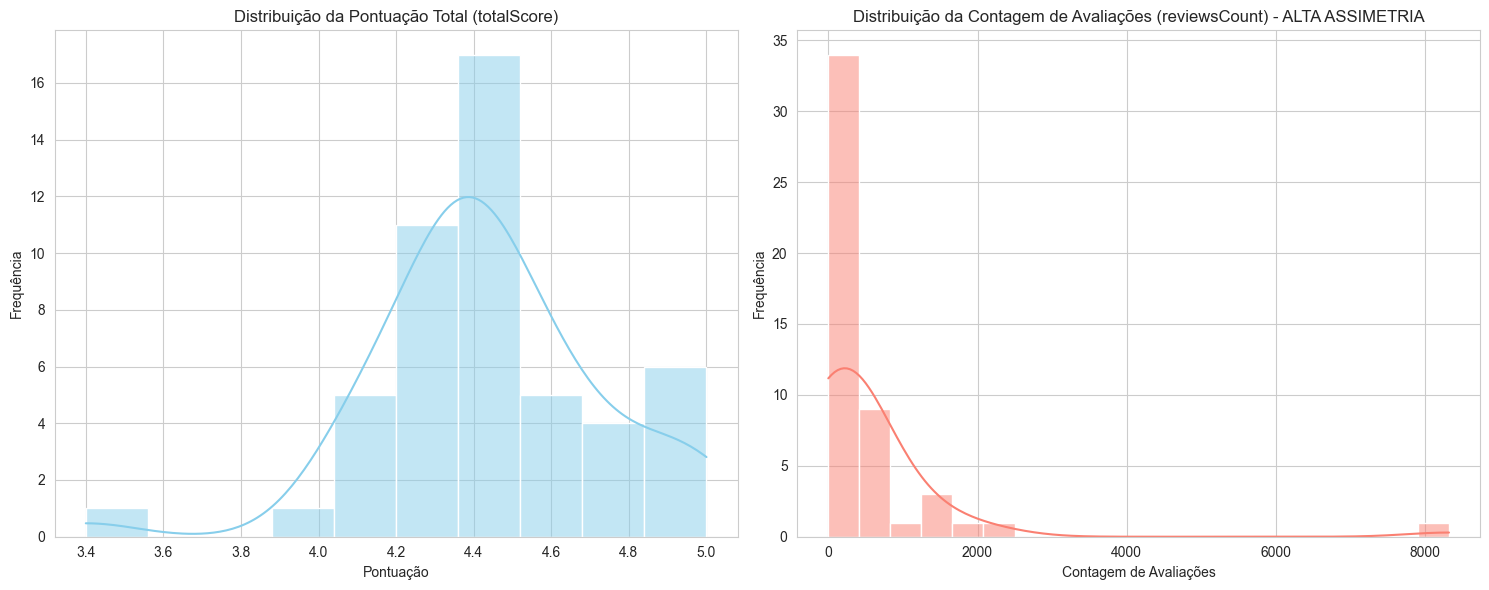

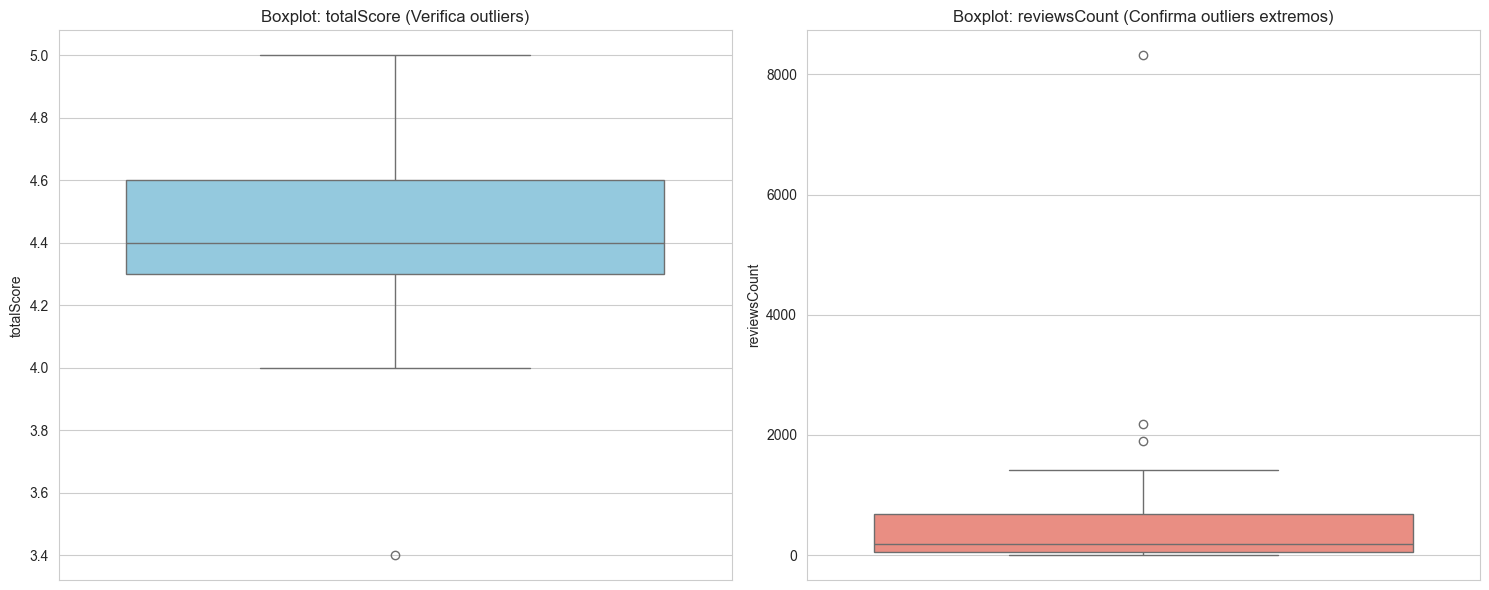

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['totalScore'], kde=True, bins=10, color='skyblue')
plt.title('Distribuição da Pontuação Total (totalScore)')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['reviewsCount'], kde=True, bins=20, color='salmon')
plt.title('Distribuição da Contagem de Avaliações (reviewsCount) - ALTA ASSIMETRIA')
plt.xlabel('Contagem de Avaliações')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['totalScore'], color='skyblue')
plt.title('Boxplot: totalScore (Verifica outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['reviewsCount'], color='salmon')
plt.title('Boxplot: reviewsCount (Confirma outliers extremos)')

plt.tight_layout()
plt.show()